## Text Classification with Naive Bayes

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score
from sklearn.metrics import recall_score,f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv('datasets/smsspamcollection.txt', sep='\t', header=None, names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
df.shape

(5572, 2)

In [9]:
le = LabelEncoder()
df['label']= le.fit_transform(df.iloc[:,0])
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
X = df.text
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5572, dtype: object

In [11]:
y = df.label
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int32

In [13]:
TFIDF = TfidfVectorizer(max_features=10000,
    stop_words='english',
    ngram_range=(1, 1),
    max_df=0.9,
    min_df=2,
    )

In [14]:
tfidf = TFIDF.fit_transform(X)
tfidf

<5572x3965 sparse matrix of type '<class 'numpy.float64'>'
	with 39099 stored elements in Compressed Sparse Row format>

In [15]:
print("Vocabulary:\n", TFIDF.vocabulary_)

Vocabulary:
 {'point': 2696, 'crazy': 1053, 'available': 570, 'bugis': 772, 'great': 1656, 'world': 3892, 'la': 2029, 'buffet': 771, 'cine': 918, 'got': 1642, 'wat': 3794, 'ok': 2530, 'lar': 2043, 'joking': 1959, 'wif': 3842, 'oni': 2539, 'free': 1519, 'entry': 1330, 'wkly': 3870, 'comp': 977, 'win': 3848, 'fa': 1394, 'cup': 1074, 'final': 1459, 'tkts': 3542, '21st': 170, '2005': 165, 'text': 3477, '87121': 350, 'receive': 2873, 'question': 2814, 'std': 3316, 'txt': 3635, 'rate': 2844, 'apply': 513, '08452810075over18': 41, 'dun': 1273, 'say': 3032, 'early': 1279, 'hor': 1780, 'nah': 2424, 'don': 1229, 'think': 3500, 'goes': 1625, 'usf': 3701, 'lives': 2121, 'freemsg': 1523, 'hey': 1742, 'darling': 1102, 'week': 3814, 'word': 3886, 'like': 2097, 'fun': 1549, 'tb': 3437, 'xxx': 3926, 'send': 3083, '50': 264, 'rcv': 2847, 'brother': 759, 'speak': 3268, 'treat': 3603, 'request': 2930, 'melle': 2286, 'oru': 2564, 'minnaminunginte': 2317, 'nurungu': 2507, 'vettam': 3725, 'set': 3098, 'calle

In [16]:
dtm = pd.DataFrame(data=tfidf.toarray(), columns=TFIDF.get_feature_names_out())
dtm

,00,000,008704050406,01223585334,02,0207,02073162414,021,03,04,...,youre,yr,yrs,yummy,yun,yunny,yuo,yup,zed,zoe
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
tfidf.toarray().shape

(5572, 3965)

In [18]:
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
X_Train, X_Test, y_Train, y_Test = train_test_split(tfidf.toarray(), y, test_size=0.2, random_state=54, shuffle=True)
X_Train.shape, X_Test.shape

((4457, 3965), (1115, 3965))

In [21]:
mm =MultinomialNB()
mm.fit(X_Train, y_Train)

MultinomialNB()

In [22]:
my_pred = mm.predict(X_Test)
my_pred

array([1, 0, 1, ..., 0, 0, 1])

In [23]:
y_Test

135     1
3132    1
797     1
3370    0
3959    0
       ..
1322    0
3121    0
3546    0
730     0
1741    1
Name: label, Length: 1115, dtype: int32

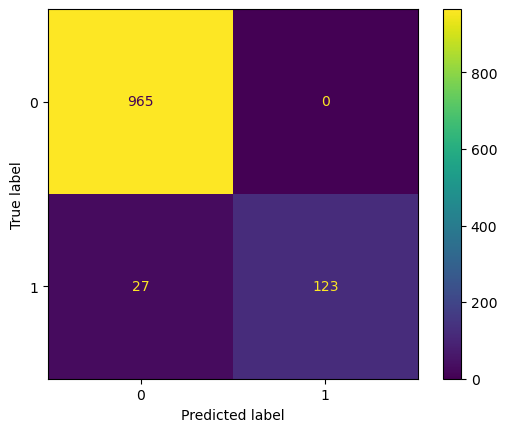

In [24]:
ConfusionMatrixDisplay.from_predictions(y_Test, my_pred)

In [25]:
acc = accuracy_score(y_Test, my_pred)
pre = precision_score(y_Test, my_pred)
recall = recall_score(y_Test, my_pred)
f1 = f1_score(y_Test, my_pred)
print("Accuracy :", acc)
print("Precision :", pre)
print("Recall :", recall)
print("F1-Score :", f1)
print("Classification Report :\n", classification_report(y_Test, my_pred))

Accuracy : 0.9757847533632287
Precision : 1.0
Recall : 0.82
F1-Score : 0.9010989010989011
Classification Report :
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.82      0.90       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



In [27]:
new = ["Congratulations! You've won a $1000 gift card. Click the link to claim your prize now!"]
new_vec = TFIDF.transform(new)
new_vec = new_vec.toarray()

In [28]:
y_hat = mm.predict(new_vec)
y_hat

array([1])

In [29]:
if y_hat == 0:
    print("The text is classified as 'ham'.")
elif y_hat == 1:
    print("The text is classified as 'spam'.")

The text is classified as 'spam'.


In [30]:
new = ["URGENT: Your account has been compromised. Please click the link to reset your password immediately."]
new_vec = TFIDF.transform(new)
new_vec = new_vec.toarray()
y_hat = mm.predict(new_vec)
if y_hat == 0:
    print("The text is classified as 'ham'.")
elif y_hat == 1:
    print("The text is classified as 'spam'.")

The text is classified as 'spam'.


In [31]:

new = ["Hi Maida, just checking in to see if you received the document I sent yesterday. Let me know if you have any questions!"]
new_vec = TFIDF.transform(new)
new_vec = new_vec.toarray()
y_hat = mm.predict(new_vec)
if y_hat == 0:
    print("The text is classified as 'ham'.")
elif y_hat == 1:
    print("The text is classified as 'spam'.")

The text is classified as 'ham'.
